## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.tsa.stattools import kpss
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Read the table of rating data, in the time period of 01/2010 à 12/2017

In [2]:
base1 = pd.read_csv(r'C:\Users\john-\Documents\Memoire\New Data\DRIM GAME 2021 2\DRIM GAME 2021\base_1.csv')
base1.columns = ['ID tiers','Date de traitement','Classe de risque']
base1['Date de traitement'] = pd.to_datetime(base1['Date de traitement'])
base1

,ID tiers,Date de traitement,Classe de risque
0,9HV38000A353IVL9XYZN,2010-01-31,1
1,9HV38000AGXAQBX9EUDP,2010-01-31,4
2,9HV38000AILMBD5IDQS9,2010-01-31,1
3,9HV38000LEFNCFBL9YNW,2010-01-31,2
4,9HV380021GXD4GD9XYZ8,2010-01-31,3
...,...,...,...
22136721,9ZRWV000XDZKBXBU4FSK,2017-12-31,7
22136722,9ZRWVJAN8S7CBHACNXNC,2017-12-31,11
22136723,9ZRWVKF3AC6FTUDU4D5W,2017-12-31,1
22136724,9ZRWVRFABWNLSF4U4BHC,2017-12-31,2


## Read the time Series of deafult rate in the period of 01/2010 à 12/2017

In [3]:
#'''TauxDeDefaut = pd.read_excel(r'C:\Users\john-\Documents\Memoire\New Data\DRIM GAME 2021 2\DRIM GAME 2021\WE12 201001-201912.xlsx')
#TauxDeDefaut['dtf_per_trt'] = pd.to_datetime(TauxDeDefaut['dtf_per_trt'])
#TauxDeDefaut.columns = ['Date','Taux De Défaut']
##TauxDeDefaut.set_index('Date',inplace=True)

# We keep only the appropriate time period
#TauxDeDefaut = TauxDeDefaut[TauxDeDefaut.index <= '2017-12-31']
#TauxDeDefaut'''

# Table Transformation

#### For the transformation of our table, we use the class 'TransMatrix' inside the file MatrixTransformations.py!

### 1.First transformation of the dataset to a crossTab, with the index dates and the counterparts that contains each date. The values are the classes of the counterparties.

In [4]:
cross = pd.crosstab([base1['Date de traitement'], base1['ID tiers']], [base1['Classe de risque'], ], rownames=['Date', 'Asset identifier'], colnames=['Classes'])

In [5]:
def find_class(row): 
    for num,value in enumerate(row):
        if value == 1: return num + 1

In [6]:
%%time
cross['Class'] = cross.apply(lambda x: find_class(x),axis=1)
cross = cross.drop(range(1,12), axis=1)

CPU times: total: 2min 4s
Wall time: 2min 4s


In [7]:
# Nouvelle form
#cross.loc['2010-01-31']
cross

Classes                          Class
Date       Asset identifier           
2010-01-31 9HV38000A353IVL9XYZN      1
           9HV38000AGXAQBX9EUDP      4
           9HV38000AILMBD5IDQS9      1
           9HV38000LEFNCFBL9YNW      2
           9HV380021GXD4GD9XYZ8      3
...                                ...
2017-12-31 9ZRWV000XDZKBXBU4FSK      7
           9ZRWVJAN8S7CBHACNXNC     11
           9ZRWVKF3AC6FTUDU4D5W      1
           9ZRWVRFABWNLSF4U4BHC      2
           9ZRWVRQYCGNBQ5EU4D3P      6

[22136726 rows x 1 columns]

### Customade class

In [8]:
from MatrixTransformations import TransMatrix

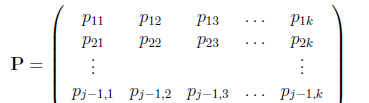

In [9]:
from IPython.display import Image
Image(filename=r'C:\Users\john-\Documents\Memoire\New Data\Notebook\Final\Photos\Probability-Matrix.png')

## Using the type above, we create the Migration Rate Matrices

### Create an object of the class


In [10]:
# Our class TransMatrix, implements all the transformations, and we initialize it here.
Dates = base1['Date de traitement'].unique()
obj = TransMatrix(cross,Dates)

# Calcul de la matrice du Taux de migration

In [11]:
%%time
obj.DataTransition()
# Model ready for transition.

The number of months is : 96


CPU times: total: 41.6 s
Wall time: 41.6 s


### The values of nomber of transition for each class per month

In [12]:
obj.getNumberOfContreparties(7)

,1,2,3,4,5,6,7,8,9,10,11
1,43710,446,347,99,14,13,3,10,6,0,0
2,1828,60171,45,89,165,155,66,5,14,0,2
3,115,651,26949,8,7,90,89,59,6,8,1
4,2,120,245,6779,2,3,55,3,34,8,3
5,0,104,84,125,6417,5,74,4,43,7,1
6,0,15,209,37,100,8118,31,58,84,31,9
7,0,12,47,152,138,129,6515,16,109,161,19
8,0,0,22,3,4,196,82,1311,37,75,8
9,0,2,6,12,30,59,236,27,890,153,45
10,0,0,0,1,2,26,147,87,106,357,191


### The values of rate of transition for each class per month (correndonding to the previous matrix)

In [13]:
obj.ListDesMatricesDuTauxDeMigration[8]

,1,2,3,4,5,6,7,8,9,10,11
1,97.637950,1.237889,0.778602,0.229644,0.030619,0.054677,0.013122,0.008748,0.004374,0.000000,0.004374
2,2.910747,95.806851,0.080452,0.207566,0.424786,0.384560,0.127114,0.009654,0.030572,0.016090,0.001609
3,0.492506,2.327889,95.808383,0.017716,0.035432,0.435815,0.655494,0.155901,0.038975,0.021259,0.010630
4,0.000000,1.485082,3.307682,91.967058,0.040502,0.108006,2.349129,0.067504,0.459025,0.121507,0.094505
5,0.000000,1.491895,1.477550,1.520585,92.196242,0.028690,2.395639,0.086071,0.588151,0.143451,0.071726
6,0.000000,0.056883,2.002275,0.284414,0.921502,91.763367,0.432309,2.662116,1.023891,0.625711,0.227531
7,0.000000,0.054975,0.096207,1.030786,0.879604,1.635514,88.757559,0.343595,4.026938,2.762507,0.412314
8,0.000000,0.000000,1.768793,0.126342,0.252685,2.274163,4.042956,81.680354,1.326595,7.770057,0.758054
9,0.000000,0.298730,0.074683,1.941748,2.240478,4.705004,7.020164,1.418969,66.392830,13.218820,2.688574
10,0.000000,0.000000,0.000000,0.380711,0.380711,2.918782,14.467005,7.868020,9.517766,40.609137,23.857868


# Matrice de migration annuelles

In [14]:
obj.AnnualMigrationMatrices()

In [15]:
obj.MatricesAnnuelles[0]

,1,2,3,4,5,6,7,8,9,10,11
1,515159,6456,4502,1158,128,214,43,102,44,0,6
2,17239,710666,540,1269,2421,2078,705,48,249,10,14
3,1483,8133,320156,76,65,1242,1583,523,79,142,15
4,4,1224,2712,78262,26,47,1111,14,361,57,15
5,2,1214,999,1303,75295,38,1186,41,482,53,23
6,5,140,2211,199,1094,96822,281,1710,866,365,71
7,1,116,356,1358,1166,1371,78154,197,2396,1626,160
8,0,6,284,16,34,1591,759,16707,361,1167,96
9,0,20,32,217,316,667,2405,278,11636,2224,447
10,0,0,3,16,31,275,1319,955,1150,4736,2049


#### Transformation des matrices annuelles à matrices annuelles des probabilité

In [16]:
obj.MatricesAnnuellesAjusted[4]

,1,2,3,4,5,6,7,8,9,10,11
1,96.381854,1.653586,1.575139,0.280196,0.017454,0.075069,0.011448,0.002627,0.001501,0.000751,0.000375
2,3.036805,95.118631,0.184175,0.335874,0.527463,0.628151,0.152293,0.009935,0.005042,0.000445,0.001186
3,0.439208,2.884240,95.179699,0.028937,0.039704,0.568189,0.646027,0.188649,0.020188,0.004935,0.000224
4,0.005006,1.464920,3.111311,93.605291,0.055693,0.080724,1.287202,0.016270,0.359816,0.011264,0.002503
5,0.006283,1.019931,0.718350,2.557855,93.505532,0.067716,1.468114,0.048169,0.576634,0.018849,0.012566
6,0.005744,0.078688,1.541590,0.186094,1.758124,93.432736,0.213089,1.626021,0.766774,0.361849,0.029292
7,0.000784,0.082318,0.250090,0.656977,1.164213,1.939571,90.802327,0.245386,2.595763,2.124590,0.137981
8,0.000000,0.024404,0.494174,0.143371,0.149472,4.035751,3.785614,82.374474,1.503874,7.049600,0.439265
9,0.010308,0.051541,0.134007,0.446689,0.738755,2.309040,8.968148,2.240319,70.425729,12.627564,2.047899
10,0.000000,0.016643,0.055475,0.083213,0.194164,1.453456,8.443360,9.369799,12.060357,49.190059,19.133474


### Cumulative Transformation of annual matrices

In [17]:
obj.setMatricesCumulativeAnnuelles()

In [18]:
obj.MatricesCumulativeAnnuelles[7]

,0,1,2,3,4,5,6,7,8,9,10
0,100.0,3.119340,1.550528,0.289548,0.048152,0.038479,0.004146,0.001063,0.000744,0.000425,0.000319
1,100.0,98.212477,1.724116,1.488992,1.102290,0.677042,0.098579,0.004336,0.002216,0.000867,0.000193
2,100.0,99.640645,97.032079,1.114534,1.066620,1.012145,0.576646,0.111392,0.005493,0.001679,0.001526
3,100.0,99.994086,98.879488,96.249320,1.350765,1.287288,1.185567,0.226310,0.220396,0.009857,0.005520
4,100.0,99.988839,99.373261,98.693722,96.510869,1.297263,1.201535,0.280745,0.245115,0.007727,0.004293
5,100.0,99.988220,99.935208,99.115780,98.947737,97.146381,1.943413,1.792000,0.644801,0.172548,0.007969
6,100.0,99.987792,99.934309,99.787813,99.253566,98.607123,96.835215,3.656013,3.468823,1.521352,0.045344
7,100.0,99.989310,99.944411,99.734884,99.627983,99.542461,97.633199,94.028479,6.886599,5.655093,0.203113
8,100.0,99.991680,99.963947,99.880748,99.653336,99.281713,97.825725,91.713351,89.530756,12.410561,1.200843
9,100.0,100.000000,99.994745,99.936938,99.795050,99.679437,98.917442,91.576016,82.563456,69.220663,15.686584


In [19]:
obj.setMatriceTTC()

In [20]:
obj.MatriceTTC

,1,2,3,4,5,6,7,8,9,10,11
1,5009987,78240,61868,12218,861,1908,317,192,103,12,32
2,159057,6085393,10370,18859,26532,31398,6378,461,502,26,60
3,16983,102004,3517469,1321,1494,15988,18175,4836,605,294,65
4,77,16580,38338,1220774,676,995,13884,119,3631,162,78
5,79,10673,9570,26995,1121511,865,13853,479,4805,206,103
6,120,1164,18807,2564,23935,1361042,2476,19165,8977,3597,296
7,50,869,2283,8118,8973,17395,924446,1878,22008,17573,919
8,11,94,1210,269,264,9347,9117,212589,3392,14621,789
9,10,120,247,1062,1666,4578,17561,4430,151609,24589,3471
10,1,12,62,146,218,1636,10720,10739,14526,59172,21289


In [21]:
matric_TTC = obj.MatriceTTCAjusted
matric_TTC

,1,2,3,4,5,6,7,8,9,10,11
1,96.984923,1.514595,1.197660,0.236520,0.016668,0.036936,0.006137,0.003717,0.001994,0.000232,0.000619
2,2.509167,95.998713,0.163590,0.297506,0.418549,0.495312,0.100615,0.007272,0.007919,0.000410,0.000947
3,0.461591,2.772425,95.603297,0.035904,0.040606,0.434547,0.493989,0.131440,0.016444,0.007991,0.001767
4,0.005945,1.279999,2.959746,94.245411,0.052188,0.076815,1.071864,0.009187,0.280318,0.012507,0.006022
5,0.006643,0.897540,0.804784,2.270130,94.312860,0.072742,1.164961,0.040281,0.404074,0.017323,0.008662
6,0.008321,0.080713,1.304101,0.177791,1.659683,94.376355,0.171689,1.328925,0.622476,0.249420,0.020525
7,0.004978,0.086510,0.227275,0.808154,0.893270,1.731687,92.029364,0.186956,2.190915,1.749407,0.091487
8,0.004370,0.037346,0.480725,0.106872,0.104886,3.713504,3.622126,84.460257,1.347620,5.808830,0.313465
9,0.004777,0.057322,0.117988,0.507301,0.795823,2.186842,8.388625,2.116144,72.421337,11.745795,1.658044
10,0.000844,0.010125,0.052311,0.123185,0.183934,1.380346,9.044811,9.060842,12.256056,49.925330,17.962218


## Matching probabilities to thresholds. (Creation of 'disjoint bins')

In [22]:
test = obj.TransformationToCumulativematrix(obj.MatriceTTCAjusted)
test.columns = range(1,12)
test.index = range(1,12)
test

,1,2,3,4,5,6,7,8,9,10,11
1,100.0,3.015077,1.500483,0.302822,0.066302,0.049635,0.012699,0.006562,0.002846,0.000852,0.000619
2,100.0,97.490833,1.492120,1.328530,1.031024,0.612475,0.117163,0.016548,0.009276,0.001357,0.000947
3,100.0,99.538409,96.765984,1.162688,1.126783,1.086177,0.651630,0.157642,0.026201,0.009757,0.001767
4,100.0,99.994055,98.714057,95.754311,1.508901,1.456712,1.379897,0.308033,0.298846,0.018528,0.006022
5,100.0,99.993357,99.095816,98.291032,96.020903,1.708043,1.635301,0.470340,0.430059,0.025985,0.008662
6,100.0,99.991679,99.910966,98.606865,98.429074,96.769391,2.393036,2.221347,0.892422,0.269945,0.020525
7,100.0,99.995022,99.908513,99.681238,98.873085,97.979815,96.248128,4.218765,4.031808,1.840894,0.091487
8,100.0,99.995630,99.958284,99.477559,99.370687,99.265801,95.552298,91.930172,7.469915,6.122295,0.313465
9,100.0,99.995223,99.937901,99.819913,99.312611,98.516788,96.329947,87.941321,85.825177,13.403840,1.658044
10,100.0,99.999156,99.989031,99.936720,99.813535,99.629602,98.249255,89.204445,80.143603,67.887547,17.962218


In [23]:
MatrixOfBinsLimits = obj.getThresholdCalcutors(test)
MatrixOfBinsLimits.columns = range(1,12)
MatrixOfBinsLimits

,1,2,3,4,5,6,7,8,9,10,11
1,3.9,-1.88,-2.17,-2.74,-3.19,-3.27,-3.58,-3.69,-3.78,-3.86,-3.87
2,3.9,1.95,-2.18,-2.22,-2.32,-2.51,-3.04,-3.53,-3.63,-3.84,-3.85
3,3.9,2.60,1.84,-2.27,-2.28,-2.30,-2.49,-2.95,-3.43,-3.62,-3.82
4,3.9,3.70,2.23,1.72,-2.17,-2.19,-2.21,-2.74,-2.75,-3.50,-3.70
5,3.9,3.69,2.37,2.12,1.75,-2.12,-2.14,-2.60,-2.63,-3.43,-3.64
6,3.9,3.65,3.11,2.20,2.16,1.84,-1.98,-2.01,-2.37,-2.78,-3.48
7,3.9,3.72,3.11,2.73,2.28,2.05,1.78,-1.73,-1.75,-2.09,-3.11
8,3.9,3.74,3.31,2.56,2.50,2.44,1.70,1.40,-1.45,-1.55,-2.73
9,3.9,3.73,3.21,2.91,2.47,2.18,1.79,1.17,1.07,-1.11,-2.13
10,3.9,3.86,3.60,3.21,2.90,2.68,2.11,1.23,0.84,0.46,-0.92


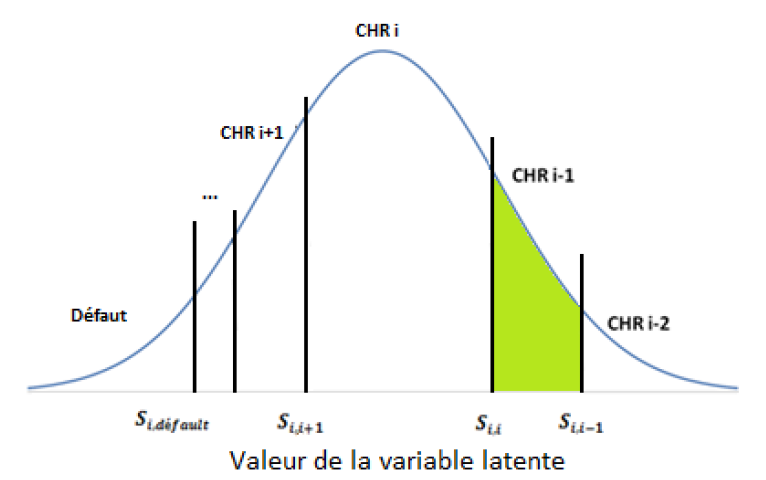

In [24]:
from IPython.display import Image
Image(filename=r'C:\Users\john-\Documents\Memoire\New Data\Notebook\Photos\valeurDeVariableLatente.png')

In [25]:
TTC = obj.getThresholdCalcutors(test)

In [26]:
TTC

,1,2,3,4,5,6,7,8,9,10,11
1,3.9,-1.88,-2.17,-2.74,-3.19,-3.27,-3.58,-3.69,-3.78,-3.86,-3.87
2,3.9,1.95,-2.18,-2.22,-2.32,-2.51,-3.04,-3.53,-3.63,-3.84,-3.85
3,3.9,2.60,1.84,-2.27,-2.28,-2.30,-2.49,-2.95,-3.43,-3.62,-3.82
4,3.9,3.70,2.23,1.72,-2.17,-2.19,-2.21,-2.74,-2.75,-3.50,-3.70
5,3.9,3.69,2.37,2.12,1.75,-2.12,-2.14,-2.60,-2.63,-3.43,-3.64
6,3.9,3.65,3.11,2.20,2.16,1.84,-1.98,-2.01,-2.37,-2.78,-3.48
7,3.9,3.72,3.11,2.73,2.28,2.05,1.78,-1.73,-1.75,-2.09,-3.11
8,3.9,3.74,3.31,2.56,2.50,2.44,1.70,1.40,-1.45,-1.55,-2.73
9,3.9,3.73,3.21,2.91,2.47,2.18,1.79,1.17,1.07,-1.11,-2.13
10,3.9,3.86,3.60,3.21,2.90,2.68,2.11,1.23,0.84,0.46,-0.92


In [27]:
Bins = TTC.copy()
tt = Bins.iloc[:,1].apply(lambda x : "(+ꚙ," + f"{x:7.2f}" + ")")
t1 = Bins.iloc[:,1].apply(lambda x : "(" + f"{x:7.2f}") + Bins.iloc[:,2].apply(lambda x : "," + f"{x:7.2f}" + ")")
for i in range(2,10):
    t = Bins.iloc[:,i].apply(lambda x : "(" + f"{x:7.2f}") + Bins.iloc[:,i + 1].apply(lambda x : "," + f"{x:7.2f}" + ")")
    t1 = pd.concat([t1,t],axis = 1)
t1 = pd.concat([tt,t1],axis = 1)
t2 = Bins.iloc[:,10].apply(lambda x : "(" + f"{x:7.2f}" + ",-ꚙ)")
t1 = pd.concat([t1,t2],axis = 1)
t1.columns = range(1,12)
t1

,1,2,3,4,5,6,7,8,9,10,11
1,"(+ꚙ, -1.88)","( -1.88, -2.17)","( -2.17, -2.74)","( -2.74, -3.19)","( -3.19, -3.27)","( -3.27, -3.58)","( -3.58, -3.69)","( -3.69, -3.78)","( -3.78, -3.86)","( -3.86, -3.87)","( -3.87,-ꚙ)"
2,"(+ꚙ, 1.95)","( 1.95, -2.18)","( -2.18, -2.22)","( -2.22, -2.32)","( -2.32, -2.51)","( -2.51, -3.04)","( -3.04, -3.53)","( -3.53, -3.63)","( -3.63, -3.84)","( -3.84, -3.85)","( -3.85,-ꚙ)"
3,"(+ꚙ, 2.60)","( 2.60, 1.84)","( 1.84, -2.27)","( -2.27, -2.28)","( -2.28, -2.30)","( -2.30, -2.49)","( -2.49, -2.95)","( -2.95, -3.43)","( -3.43, -3.62)","( -3.62, -3.82)","( -3.82,-ꚙ)"
4,"(+ꚙ, 3.70)","( 3.70, 2.23)","( 2.23, 1.72)","( 1.72, -2.17)","( -2.17, -2.19)","( -2.19, -2.21)","( -2.21, -2.74)","( -2.74, -2.75)","( -2.75, -3.50)","( -3.50, -3.70)","( -3.70,-ꚙ)"
5,"(+ꚙ, 3.69)","( 3.69, 2.37)","( 2.37, 2.12)","( 2.12, 1.75)","( 1.75, -2.12)","( -2.12, -2.14)","( -2.14, -2.60)","( -2.60, -2.63)","( -2.63, -3.43)","( -3.43, -3.64)","( -3.64,-ꚙ)"
6,"(+ꚙ, 3.65)","( 3.65, 3.11)","( 3.11, 2.20)","( 2.20, 2.16)","( 2.16, 1.84)","( 1.84, -1.98)","( -1.98, -2.01)","( -2.01, -2.37)","( -2.37, -2.78)","( -2.78, -3.48)","( -3.48,-ꚙ)"
7,"(+ꚙ, 3.72)","( 3.72, 3.11)","( 3.11, 2.73)","( 2.73, 2.28)","( 2.28, 2.05)","( 2.05, 1.78)","( 1.78, -1.73)","( -1.73, -1.75)","( -1.75, -2.09)","( -2.09, -3.11)","( -3.11,-ꚙ)"
8,"(+ꚙ, 3.74)","( 3.74, 3.31)","( 3.31, 2.56)","( 2.56, 2.50)","( 2.50, 2.44)","( 2.44, 1.70)","( 1.70, 1.40)","( 1.40, -1.45)","( -1.45, -1.55)","( -1.55, -2.73)","( -2.73,-ꚙ)"
9,"(+ꚙ, 3.73)","( 3.73, 3.21)","( 3.21, 2.91)","( 2.91, 2.47)","( 2.47, 2.18)","( 2.18, 1.79)","( 1.79, 1.17)","( 1.17, 1.07)","( 1.07, -1.11)","( -1.11, -2.13)","( -2.13,-ꚙ)"
10,"(+ꚙ, 3.86)","( 3.86, 3.60)","( 3.60, 3.21)","( 3.21, 2.90)","( 2.90, 2.68)","( 2.68, 2.11)","( 2.11, 1.23)","( 1.23, 0.84)","( 0.84, 0.46)","( 0.46, -0.92)","( -0.92,-ꚙ)"


In [28]:
#STOP

---

In [29]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    # mean = sum(data) / n
    mean = 0
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / (n )
    return variance

In [30]:
from Z_ScoreCalculation import Z_ScoreCalcul

In [31]:
min = 100
value = -1
for cor in range(1,60,5):
    List = []
    for ind in range(8):
        List.append(Z_ScoreCalcul(obj.MatricesAnnuelles[ind], obj.MatricesAnnuellesAjusted[ind], TTC, cor/100))
    targetVariance = 1 - abs(variance(List))
    if(targetVariance < min):
        min = targetVariance
        valeur = cor

print('The best approche has variance {} for correlation {}' .format(min+1,valeur))

The best approche has variance 1.958503068359375 for correlation 1


### Tester

In [32]:
List = []
for ind in range(8):
    List.append(Z_ScoreCalcul(obj.MatricesAnnuelles[ind], obj.MatricesAnnuellesAjusted[ind], TTC, 0.01))

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
Z = pd.DataFrame(List, index = range(2010, 2018), columns = ['Values of Z'])
Z

,Values of Z
2010,0.326063
2011,0.375438
2012,0.236938
2013,0.018813
2014,-0.004375
2015,0.133375
2016,0.101000
2017,-0.014250


<AxesSubplot:ylabel='Values of Z'>

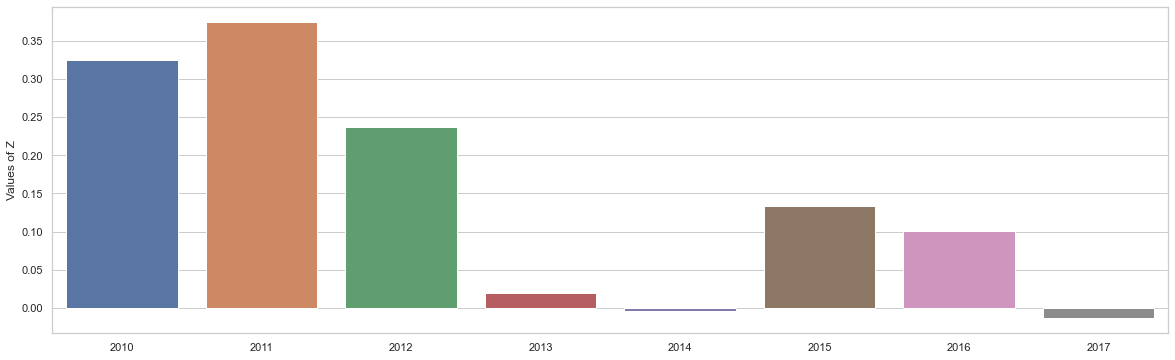

In [35]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("bright")
sns.barplot(x=Z.index, y="Values of Z", data=Z,
            label="en cours")

In [36]:
abs(variance(List))

0.04149693164062507

In [37]:
from MigrationProbabilityEstimationX import Delta
from MigrationProbabilityEstimationX import ListOfDelta

In [38]:
IndVar = pd.DataFrame(List, index = range(2010,2018),columns = ['Indep_Var'])
IndVar

,Indep_Var
2010,0.326063
2011,0.375438
2012,0.236938
2013,0.018813
2014,-0.004375
2015,0.133375
2016,0.101000
2017,-0.014250


In [39]:
liii = ListOfDelta(len(obj.MatricesAnnuellesAjusted), TTC, 0.01, IndVar)
#liii = ListOfDelta(obj.MatricesAnnuellesAjusted, TTC, 0.45, IndVar)
fitted = liii[5]
fitted.index = range(1,12)
fitted


,1,2,3,4,5,6,7,8,9,10,11
1,97.142475,1.442277,1.127867,0.218480,0.015849,0.033138,0.005342,0.003003,0.001926,0.000201,0.004729
2,2.575534,96.044922,0.135129,0.288609,0.390564,0.453065,0.089030,0.005931,0.007147,0.000218,0.005140
3,0.461848,2.852347,95.594005,0.028479,0.055014,0.410058,0.448620,0.118002,0.013912,0.007186,0.005819
4,0.005873,1.284034,3.020281,94.274564,0.070626,0.067551,0.989691,0.008595,0.253401,0.011200,0.009473
5,0.006299,0.881948,0.818889,2.333840,94.353032,0.078799,1.091169,0.036734,0.367662,0.014895,0.012022
6,0.008173,0.079970,1.305772,0.149825,1.770456,94.424290,0.156881,1.269709,0.580530,0.227382,0.022303
7,0.005066,0.083077,0.223507,0.819749,0.897197,1.756969,92.222090,0.169763,2.091849,1.641305,0.084718
8,0.004317,0.037102,0.478020,0.098262,0.114240,3.765630,3.668935,84.760323,1.261829,5.515125,0.291507
9,0.004684,0.056360,0.114258,0.497393,0.794492,2.236223,8.543736,2.160274,72.642931,11.383484,1.561455
10,0.000844,0.010093,0.050108,0.120134,0.182139,1.386899,9.315513,9.233150,12.371165,49.914062,17.411183


In [40]:
obj.MatricesAnnuellesAjusted[5]

,1,2,3,4,5,6,7,8,9,10,11
1,96.091089,2.036928,1.593930,0.238857,0.012159,0.023998,0.001440,0.000480,0.000640,0.000480,0.000000
2,2.275469,96.016222,0.220369,0.366250,0.450145,0.601310,0.067399,0.001160,0.001289,0.000000,0.000387
3,0.387000,2.825460,95.712099,0.036838,0.041394,0.423245,0.475531,0.093284,0.003367,0.000594,0.001188
4,0.005976,1.357695,2.830568,94.532820,0.050526,0.086927,0.950767,0.003803,0.174941,0.002716,0.003260
5,0.005431,0.769370,0.614289,2.395004,94.799662,0.077239,0.981776,0.034999,0.311972,0.006638,0.003621
6,0.010286,0.043016,1.033314,0.148685,1.724839,95.139684,0.120631,1.078667,0.498422,0.195441,0.007013
7,0.004089,0.058603,0.139692,0.487220,0.734578,1.841214,93.369722,0.130834,1.630653,1.562511,0.040886
8,0.004880,0.017079,0.214707,0.073196,0.073196,2.081198,3.325526,88.496072,0.858830,4.689406,0.165910
9,0.006044,0.048356,0.084623,0.247824,0.589338,1.423477,5.681818,2.139749,79.128385,9.622824,1.027563
10,0.000000,0.005908,0.035448,0.082713,0.165426,1.110717,8.519438,8.578518,12.867777,53.970223,14.663831


## Variables Explicatives

In [41]:
def relevantData(variable):
    variable['DATE'] = pd.to_datetime(variable['DATE'], format='%Y-%m-%d')
    variable = variable.loc[(variable['DATE'] >= '2010-01-01') & (variable['DATE'] <= '2019-12-31')]
    return variable

In [42]:
path = r'C:\Users\john-\Documents\Memoire\New Data\Notebook\Final\Italie'
def readFile(File):
    pathFile = path + '\\' + value
    return pd.read_csv(pathFile)

In [43]:
VariableFiles = {
    'Long_Term_Government_Bond_Yields' : 'IRLTLT01ITM156N.csv',
    'Consumer_Price_Index' : 'ITACPIALLMINMEI.csv',
    'Inflation' : 'FPCPITOTLZGITA.csv',
    'Production_of_Total_Industry_in_Italy' : 'ITAPROINDMISMEI.csv',
    'Economic_Policy_Uncertainty_Index_for_Europe' : 'EUEPUINDXM.csv',
    'Interbank_Rates_for_Italy' : 'IR3TIB01ITM156N.csv',
    'Growth_Rate_Same_Period_Previous_Year' : 'CPALTT01ITM659N.csv',
    'Growth_Rate_Previous_Period' : 'CPALTT01ITM657N.csv',
    'Real_Gross_Domestic_Product' : 'NGDPRXDCITA.csv',
    'Unemployment_Rate' : 'LRUN64TTITA156N.csv',
    'General_Government_Gross_Debt' : 'GGGDTAITA188N.csv',
    'Working_Age_Population' : 'LFWA64TTITA647S.csv'
}
# Not Seasonally Adjusted

In [44]:
for key, value in VariableFiles.items():
    # Read the each file stored in the specified path
    dataframe = readFile(value)
    
    # Keep the time relevant to our research using the function <<relevantData>>
    ExplanatoryVariableTimelyRelevant = relevantData(dataframe).set_index('DATE')
    ExplanatoryVariableTimelyRelevant.columns = [key]
    
    # Create a dataframe that reassemble all the explanatory variables
    if key == 'Long_Term_Government_Bond_Yields':
        ExplanatoryVariables = ExplanatoryVariableTimelyRelevant
        continue
    ExplanatoryVariables = pd.concat([ExplanatoryVariables,ExplanatoryVariableTimelyRelevant], axis=1)

In [45]:
ExplanatoryVariables

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Economic_Policy_Uncertainty_Index_for_Europe,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population
DATE,,,,,,,,,,,,
2010-01-01,4.0779,92.158233,1.525516,105.591201,142.00356,0.6797,1.316752,0.144613,1611279.4,8.625846,119.198,39028225.0
2010-02-01,4.0470,92.224773,NaN,104.591284,136.73906,0.6617,1.167883,0.072202,NaN,NaN,NaN,NaN
2010-03-01,3.9450,92.490934,NaN,105.191234,137.83830,0.6450,1.385850,0.288600,NaN,NaN,NaN,NaN
2010-04-01,3.9956,92.823635,NaN,106.091159,152.78447,0.6447,1.528384,0.359712,NaN,NaN,NaN,NaN
2010-05-01,3.9900,92.890175,NaN,106.491126,203.30525,0.6865,1.379811,0.071685,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.4036,103.500000,NaN,105.491209,277.04245,-0.4077,0.387973,0.387973,NaN,NaN,NaN,NaN
2019-09-01,0.9021,102.900000,NaN,104.991251,245.14056,-0.4176,0.292398,-0.579710,NaN,NaN,NaN,NaN
2019-10-01,1.0036,102.800000,NaN,103.891342,250.56589,-0.4129,0.194932,-0.097182,NaN,NaN,NaN,NaN


In [46]:
ExplanatoryVariablesYearly = []
for year in range(2010,2018):
    ExplanatoryVariablesYearly.append(ExplanatoryVariables[ExplanatoryVariables.index.year == year].sum()/12)

TestVariables = []
for year in range(2018,2020):
    TestVariables.append(ExplanatoryVariables[ExplanatoryVariables.index.year == year].sum()/12)

In [47]:
ExplanatoryVariablesYearly = pd.DataFrame(ExplanatoryVariablesYearly, index = range(2010,2018))
ExplanatoryVariablesYearly

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Economic_Policy_Uncertainty_Index_for_Europe,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population
2010,4.035708,92.995531,0.127126,107.791017,167.253334,0.810950,1.524958,0.155475,134273.283333,0.718820,9.933167,3.252352e+06
2011,5.422758,95.581395,0.231719,108.640947,194.740139,1.390600,2.778950,0.270091,135223.043043,0.718948,9.974333,3.259556e+06
2012,5.492675,98.488372,0.253447,102.399800,209.984042,0.573183,3.043549,0.190333,131192.171552,0.917778,10.541083,3.258973e+06
2013,4.316425,99.689922,0.101666,99.250062,184.942679,0.220667,1.222716,0.054815,128776.837808,1.044228,11.037917,3.264296e+06
2014,2.893200,99.930233,0.020087,98.625115,146.358358,0.209933,0.241673,0.000137,128770.981627,1.085923,11.280500,3.263421e+06
2015,1.713950,99.968992,0.003233,99.641697,163.499142,-0.019367,0.038753,0.008070,129773.211779,1.014234,11.273333,3.252900e+06
2016,1.486433,99.875000,-0.007835,101.691526,274.780983,-0.263692,-0.093699,0.040705,131451.779909,0.992926,11.232000,3.239246e+06
2017,2.112925,101.100000,0.102211,105.491209,226.049149,-0.329050,1.227106,0.074806,133644.210305,0.953351,11.177917,3.227142e+06


In [48]:
TestVariables = pd.DataFrame(TestVariables, index = range(2018,2020))
TestVariables

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Economic_Policy_Uncertainty_Index_for_Europe,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population
2018,2.610400,102.250,0.094791,106.416132,203.994549,-0.322092,1.137437,0.090437,134881.503026,0.897276,11.200000,3.215648e+06
2019,1.913225,102.875,0.050937,105.166236,232.027694,-0.356333,0.612413,0.040933,135434.892555,0.842831,11.213583,3.202288e+06


In [49]:
ExplanatoryVariablesYearly.corr()

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Economic_Policy_Uncertainty_Index_for_Europe,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population
Long_Term_Government_Bond_Yields,1.000000,-0.564381,0.906036,0.384150,-0.240601,0.842046,0.906144,0.810903,0.274396,-0.539389,-0.752510,0.621215
Consumer_Price_Index,-0.564381,1.000000,-0.486927,-0.712596,0.273591,-0.814155,-0.486305,-0.691291,-0.626395,0.889282,0.935675,-0.296632
Inflation,0.906036,-0.486927,1.000000,0.587071,-0.004693,0.735685,0.999999,0.912083,0.519930,-0.641281,-0.751418,0.268443
Production_of_Total_Industry_in_Italy,0.384150,-0.712596,0.587071,1.000000,0.165592,0.590221,0.586298,0.795985,0.987830,-0.936971,-0.810661,-0.293715
Economic_Policy_Uncertainty_Index_for_Europe,-0.240601,0.273591,-0.004693,0.165592,1.000000,-0.359547,-0.004601,0.089442,0.269249,0.002083,0.155774,-0.648621
Interbank_Rates_for_Italy,0.842046,-0.814155,0.735685,0.590221,-0.359547,1.000000,0.735176,0.845391,0.497752,-0.774949,-0.899527,0.588031
Growth_Rate_Same_Period_Previous_Year,0.906144,-0.486305,0.999999,0.586298,-0.004601,0.735176,1.000000,0.911660,0.519116,-0.640522,-0.750878,0.268661
Growth_Rate_Previous_Period,0.810903,-0.691291,0.912083,0.795985,0.089442,0.845391,0.911660,1.000000,0.748741,-0.861303,-0.896907,0.176972
Real_Gross_Domestic_Product,0.274396,-0.626395,0.519930,0.987830,0.269249,0.497752,0.519116,0.748741,1.000000,-0.894057,-0.728897,-0.406871
Unemployment_Rate,-0.539389,0.889282,-0.641281,-0.936971,0.002083,-0.774949,-0.640522,-0.861303,-0.894057,1.000000,0.946481,0.009621


In [50]:
Dataset = pd.concat([ExplanatoryVariablesYearly, IndVar], axis=1)

In [51]:
size = Dataset.corr().shape[0]
r = np.abs(Dataset.corr().iloc[:,size-1]).sort_values(ascending=False)
r.drop(index = 'Indep_Var', inplace = True)
r

General_Government_Gross_Debt                   0.911158
Unemployment_Rate                               0.895498
Consumer_Price_Index                            0.866589
Interbank_Rates_for_Italy                       0.849298
Growth_Rate_Previous_Period                     0.843416
Production_of_Total_Industry_in_Italy           0.708800
Real_Gross_Domestic_Product                     0.664562
Inflation                                       0.634046
Growth_Rate_Same_Period_Previous_Year           0.633376
Long_Term_Government_Bond_Yields                0.611941
Working_Age_Population                          0.270243
Economic_Policy_Uncertainty_Index_for_Europe    0.075392
Name: Indep_Var, dtype: float64

In [52]:
Dataset.drop(columns=['Economic_Policy_Uncertainty_Index_for_Europe'], inplace=True)

In [53]:
Dataset

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population,Indep_Var
2010,4.035708,92.995531,0.127126,107.791017,0.810950,1.524958,0.155475,134273.283333,0.718820,9.933167,3.252352e+06,0.326063
2011,5.422758,95.581395,0.231719,108.640947,1.390600,2.778950,0.270091,135223.043043,0.718948,9.974333,3.259556e+06,0.375438
2012,5.492675,98.488372,0.253447,102.399800,0.573183,3.043549,0.190333,131192.171552,0.917778,10.541083,3.258973e+06,0.236938
2013,4.316425,99.689922,0.101666,99.250062,0.220667,1.222716,0.054815,128776.837808,1.044228,11.037917,3.264296e+06,0.018813
2014,2.893200,99.930233,0.020087,98.625115,0.209933,0.241673,0.000137,128770.981627,1.085923,11.280500,3.263421e+06,-0.004375
2015,1.713950,99.968992,0.003233,99.641697,-0.019367,0.038753,0.008070,129773.211779,1.014234,11.273333,3.252900e+06,0.133375
2016,1.486433,99.875000,-0.007835,101.691526,-0.263692,-0.093699,0.040705,131451.779909,0.992926,11.232000,3.239246e+06,0.101000
2017,2.112925,101.100000,0.102211,105.491209,-0.329050,1.227106,0.074806,133644.210305,0.953351,11.177917,3.227142e+06,-0.014250


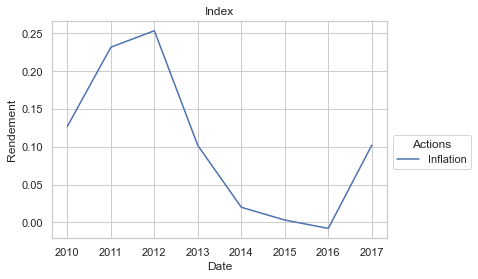

In [54]:
Dataset.loc[:,['Inflation',]].plot()
plt.title('Index')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title="Actions")
plt.show();

## We are going to implement Linear Regression

In [55]:
Stas = []
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values= kpss(series, **kw)
    Stas.append(f'{"NOT " if p_value < 0.05 else ""}Stationary')
for var in Dataset.columns:
    # print(f'{var}')
    kpss_test(Dataset[var])

In [56]:
#Test de normalité (Shapiro-Wilk)
#H0 : distribution normale
#HA : pas de distribution normale
p_value = 0.05
Normal = []
for var in Dataset.columns :
    a,b= stats.shapiro(Dataset[[var]])
    #print ("Statistiques", a, "p_value", b)
    if b < p_value:
        Normal.append("Normal distribution")
    else:
        Normal.append("NOT a Normal distribution")

In [57]:
pd.DataFrame(list(zip(Stas,Normal)), index=Dataset.columns, columns=['Stationarity Results', 'Normality Results'])

,Stationarity Results,Normality Results
Long_Term_Government_Bond_Yields,Stationary,NOT a Normal distribution
Consumer_Price_Index,Stationary,Normal distribution
Inflation,Stationary,NOT a Normal distribution
Production_of_Total_Industry_in_Italy,Stationary,NOT a Normal distribution
Interbank_Rates_for_Italy,Stationary,NOT a Normal distribution
Growth_Rate_Same_Period_Previous_Year,Stationary,NOT a Normal distribution
Growth_Rate_Previous_Period,Stationary,NOT a Normal distribution
Real_Gross_Domestic_Product,Stationary,NOT a Normal distribution
Unemployment_Rate,Stationary,NOT a Normal distribution
General_Government_Gross_Debt,Stationary,Normal distribution


In [58]:
import Linear_Regression

In [59]:
results = Linear_Regression.COLLINEARITY(Dataset)

In [60]:
Dataset

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population,Indep_Var
2010,4.035708,92.995531,0.127126,107.791017,0.810950,1.524958,0.155475,134273.283333,0.718820,9.933167,3.252352e+06,0.326063
2011,5.422758,95.581395,0.231719,108.640947,1.390600,2.778950,0.270091,135223.043043,0.718948,9.974333,3.259556e+06,0.375438
2012,5.492675,98.488372,0.253447,102.399800,0.573183,3.043549,0.190333,131192.171552,0.917778,10.541083,3.258973e+06,0.236938
2013,4.316425,99.689922,0.101666,99.250062,0.220667,1.222716,0.054815,128776.837808,1.044228,11.037917,3.264296e+06,0.018813
2014,2.893200,99.930233,0.020087,98.625115,0.209933,0.241673,0.000137,128770.981627,1.085923,11.280500,3.263421e+06,-0.004375
2015,1.713950,99.968992,0.003233,99.641697,-0.019367,0.038753,0.008070,129773.211779,1.014234,11.273333,3.252900e+06,0.133375
2016,1.486433,99.875000,-0.007835,101.691526,-0.263692,-0.093699,0.040705,131451.779909,0.992926,11.232000,3.239246e+06,0.101000
2017,2.112925,101.100000,0.102211,105.491209,-0.329050,1.227106,0.074806,133644.210305,0.953351,11.177917,3.227142e+06,-0.014250


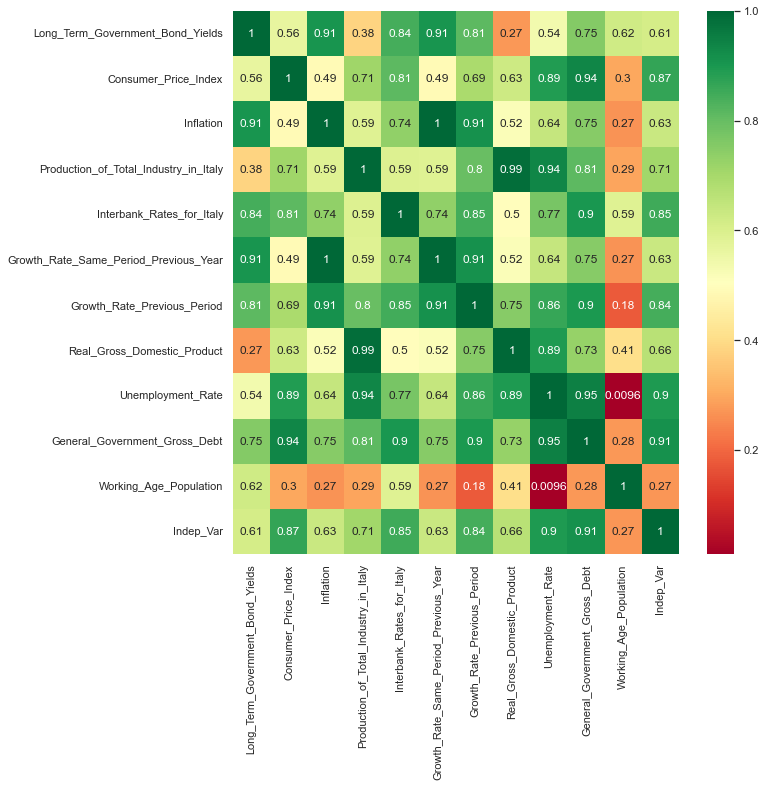

In [61]:
results.HeatMap()

In [62]:
combin = results.Combinations(0.6)

In [63]:
combin

[['Consumer_Price_Index',
  'Growth_Rate_Previous_Period',
  'Unemployment_Rate',
  'General_Government_Gross_Debt',
  'Working_Age_Population',
  'Long_Term_Government_Bond_Yields'],
 ['Long_Term_Government_Bond_Yields',
  'Inflation',
  'Production_of_Total_Industry_in_Italy',
  'Interbank_Rates_for_Italy',
  'Growth_Rate_Same_Period_Previous_Year',
  'Growth_Rate_Previous_Period',
  'Real_Gross_Domestic_Product',
  'Working_Age_Population',
  'Consumer_Price_Index'],
 ['Consumer_Price_Index',
  'Production_of_Total_Industry_in_Italy',
  'Interbank_Rates_for_Italy',
  'Real_Gross_Domestic_Product',
  'Unemployment_Rate',
  'General_Government_Gross_Debt',
  'Working_Age_Population',
  'Inflation'],
 ['Consumer_Price_Index',
  'Inflation',
  'Interbank_Rates_for_Italy',
  'Growth_Rate_Same_Period_Previous_Year',
  'Growth_Rate_Previous_Period',
  'General_Government_Gross_Debt',
  'Production_of_Total_Industry_in_Italy'],
 ['Consumer_Price_Index',
  'Inflation',
  'Production_of_Total

In [64]:
Groups = pd.DataFrame(combin, index = range(len(combin))).T
Groups

,0,1,2,3,4,5,6,7
0,Consumer_Price_Index,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Consumer_Price_Index,Consumer_Price_Index,Consumer_Price_Index,Long_Term_Government_Bond_Yields,Consumer_Price_Index
1,Growth_Rate_Previous_Period,Inflation,Production_of_Total_Industry_in_Italy,Inflation,Inflation,Production_of_Total_Industry_in_Italy,Consumer_Price_Index,Inflation
2,Unemployment_Rate,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Interbank_Rates_for_Italy,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy
3,General_Government_Gross_Debt,Interbank_Rates_for_Italy,Real_Gross_Domestic_Product,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Same_Period_Previous_Year,Real_Gross_Domestic_Product,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year
4,Working_Age_Population,Growth_Rate_Same_Period_Previous_Year,Unemployment_Rate,Growth_Rate_Previous_Period,Growth_Rate_Previous_Period,Unemployment_Rate,Real_Gross_Domestic_Product,Growth_Rate_Previous_Period
5,Long_Term_Government_Bond_Yields,Growth_Rate_Previous_Period,General_Government_Gross_Debt,General_Government_Gross_Debt,Real_Gross_Domestic_Product,General_Government_Gross_Debt,Growth_Rate_Previous_Period,General_Government_Gross_Debt
6,None,Real_Gross_Domestic_Product,Working_Age_Population,Production_of_Total_Industry_in_Italy,Unemployment_Rate,Working_Age_Population,None,Working_Age_Population
7,None,Working_Age_Population,Inflation,None,Working_Age_Population,Growth_Rate_Same_Period_Previous_Year,None,Real_Gross_Domestic_Product
8,None,Consumer_Price_Index,None,None,Interbank_Rates_for_Italy,None,None,None


### Here we have some groups of uncorrelated variables 
### We will perform the Bootstrap test for every one of those subgroups and obtain a result for each one
### Bootstrap test details . Number of iterations, 

### Compare the results of each linear regression approache with the R squared metric.



### We have two Groups of variables. We will examine the criteries of linear Regression at each one.


In [65]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.iloc[:,:], i) for i in range(X.shape[1])]

    return(vif)

In [66]:
Dataset

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population,Indep_Var
2010,4.035708,92.995531,0.127126,107.791017,0.810950,1.524958,0.155475,134273.283333,0.718820,9.933167,3.252352e+06,0.326063
2011,5.422758,95.581395,0.231719,108.640947,1.390600,2.778950,0.270091,135223.043043,0.718948,9.974333,3.259556e+06,0.375438
2012,5.492675,98.488372,0.253447,102.399800,0.573183,3.043549,0.190333,131192.171552,0.917778,10.541083,3.258973e+06,0.236938
2013,4.316425,99.689922,0.101666,99.250062,0.220667,1.222716,0.054815,128776.837808,1.044228,11.037917,3.264296e+06,0.018813
2014,2.893200,99.930233,0.020087,98.625115,0.209933,0.241673,0.000137,128770.981627,1.085923,11.280500,3.263421e+06,-0.004375
2015,1.713950,99.968992,0.003233,99.641697,-0.019367,0.038753,0.008070,129773.211779,1.014234,11.273333,3.252900e+06,0.133375
2016,1.486433,99.875000,-0.007835,101.691526,-0.263692,-0.093699,0.040705,131451.779909,0.992926,11.232000,3.239246e+06,0.101000
2017,2.112925,101.100000,0.102211,105.491209,-0.329050,1.227106,0.074806,133644.210305,0.953351,11.177917,3.227142e+06,-0.014250


In [67]:
Groups

,0,1,2,3,4,5,6,7
0,Consumer_Price_Index,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Consumer_Price_Index,Consumer_Price_Index,Consumer_Price_Index,Long_Term_Government_Bond_Yields,Consumer_Price_Index
1,Growth_Rate_Previous_Period,Inflation,Production_of_Total_Industry_in_Italy,Inflation,Inflation,Production_of_Total_Industry_in_Italy,Consumer_Price_Index,Inflation
2,Unemployment_Rate,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Interbank_Rates_for_Italy,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy
3,General_Government_Gross_Debt,Interbank_Rates_for_Italy,Real_Gross_Domestic_Product,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Same_Period_Previous_Year,Real_Gross_Domestic_Product,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year
4,Working_Age_Population,Growth_Rate_Same_Period_Previous_Year,Unemployment_Rate,Growth_Rate_Previous_Period,Growth_Rate_Previous_Period,Unemployment_Rate,Real_Gross_Domestic_Product,Growth_Rate_Previous_Period
5,Long_Term_Government_Bond_Yields,Growth_Rate_Previous_Period,General_Government_Gross_Debt,General_Government_Gross_Debt,Real_Gross_Domestic_Product,General_Government_Gross_Debt,Growth_Rate_Previous_Period,General_Government_Gross_Debt
6,None,Real_Gross_Domestic_Product,Working_Age_Population,Production_of_Total_Industry_in_Italy,Unemployment_Rate,Working_Age_Population,None,Working_Age_Population
7,None,Working_Age_Population,Inflation,None,Working_Age_Population,Growth_Rate_Same_Period_Previous_Year,None,Real_Gross_Domestic_Product
8,None,Consumer_Price_Index,None,None,Interbank_Rates_for_Italy,None,None,None


In [136]:
FinalGroups = []
for i in Groups.columns:
    g = list(Groups.iloc[:,i].dropna().values)
    set = Dataset.loc[:,g]
    GroupOne = calc_vif(set)
    GroupOne = GroupOne.T

    maxOfGroup = GroupOne.loc['VIF'].max()
    #CorrelatedVar = GroupOne.loc[:,GroupOne.loc['VIF'] == maxOfGroup].iloc[0].values[0]
    while maxOfGroup > 5:
        GroupOne = GroupOne.drop(columns=GroupOne.loc[:,GroupOne.loc['VIF'] == maxOfGroup].columns)

        g = list(GroupOne.iloc[0])
        set = Dataset.loc[:,g]
        GroupOne = calc_vif(set)
        GroupOne = GroupOne.T
        
        maxOfGroup = GroupOne.loc['VIF'].max()
        #CorrelatedVar = GroupOne.loc[:,GroupOne.loc['VIF'] == maxOfGroup].iloc[0].values[0]

    FinalGroups.append(list(GroupOne.T.set_index(['variables']).index))

    



In [137]:
FinalGroups = FinalGroups[0:7]
# Delete the duplicate
FinalGroupsf = pd.DataFrame(FinalGroups).T
FinalGroupsf.columns = ['Group' + str(i) for i in range(1,8)] 
FinalGroupsf

,Group1,Group2,Group3,Group4,Group5,Group6,Group7
0,Growth_Rate_Previous_Period,Interbank_Rates_for_Italy,Interbank_Rates_for_Italy,Inflation,Unemployment_Rate,Interbank_Rates_for_Italy,Production_of_Total_Industry_in_Italy
1,Unemployment_Rate,Consumer_Price_Index,Unemployment_Rate,Interbank_Rates_for_Italy,Interbank_Rates_for_Italy,Unemployment_Rate,Interbank_Rates_for_Italy
2,None,None,Inflation,General_Government_Gross_Debt,None,Growth_Rate_Same_Period_Previous_Year,None


In [71]:
import Group_Evaluation

In [132]:
GroupRsquared_adj = []
GroupScorelist = []
for i in range(len(FinalGroups)):
    subgroup = Dataset[FinalGroups[i] + ['Indep_Var']]
    gp = Group_Evaluation.Evaluation(subgroup, 10)
    GroupScorelist.append(gp.modelEvaluation())
    mco = smf.ols('Indep_Var'+'~' + '+'.join(FinalGroups[i]),data = Dataset).fit()
    GroupRsquared_adj.append(mco.rsquared_adj)

In [138]:
ResultsOfBootstrap = pd.DataFrame({'Group Rsquared_adj' : GroupRsquared_adj, 'RMSE for Bootstrap Group' : GroupScorelist}, index = ['Group' + str(i) for i in range(1,8)] )
ResultsOfBootstrap

,Group Rsquared_adj,RMSE for Bootstrap Group
Group1,0.750891,2.747383e-16
Group2,0.737185,1.596779e-14
Group3,0.763345,3.947778e-16
Group4,0.726021,3.501984e-15
Group5,0.807248,2.242171e-16
Group6,0.763342,2.944201e-16
Group7,0.702357,8.344992e-15


In [75]:
SumOfRsquared = ResultsOfBootstrap.sum()['Group Rsquared_adj']
SumOfRsquared

5.250388182535824

To trouve the final values of our predictions, we sum the product of Group Predictions with the Group Rsquared adjusted value, and divise the final value with the sum of all Rsquared values.

In [139]:
mco = []
predictionParGroup = []
WeightedSumOfRsquaredAdjValues = 0 
for i in range(len(FinalGroups)):
    mco.append(smf.ols('Indep_Var'+'~' + '+'.join(FinalGroups[i]),data = Dataset).fit())
    predictionParGroup.append(mco[i].predict(TestVariables))
    #print('predictionParGroup[i]:  {}'.format(predictionParGroup[i]))
    #print('GroupScorelist[i]:  {}'.format(GroupScorelist[i]))  
    #print(predictionParGroup[i] * GroupRsquared_adj[i])  
    WeightedSumOfRsquaredAdjValues += predictionParGroup[i] * GroupRsquared_adj[i]

WeightedSumOfRsquaredAdjValues = WeightedSumOfRsquaredAdjValues / SumOfRsquared
WeightedSumOfRsquaredAdjValues


2018    0.077247
2019    0.089882
dtype: float64

In [134]:
GroupPredictions = pd.DataFrame(predictionParGroup)
GroupPredictions = GroupPredictions.T
# GroupPredictions['Total'] = GroupPredictions.apply(np.sum,axis=1) / len(FinalGroups)
GroupPredictions = pd.concat([GroupPredictions,WeightedSumOfRsquaredAdjValues],axis = 1)
GroupPredictions.columns = ['Group' + str(i) for i in range(1,8)] + ['Total']
GroupPredictions

,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Total
2018,0.166332,-0.033538,0.096517,0.028480,0.102472,0.096525,0.077808,0.077247
2019,0.182954,-0.055172,0.133171,0.033318,0.133797,0.133156,0.056545,0.089882


In [79]:
Predictions = GroupPredictions.loc[:,['Total']]
liis = ListOfDelta(Predictions.shape[0], TTC, 0.01, Predictions)

fitted = liis[0]
fitted.index = range(1,12)
fitted

,1,2,3,4,5,6,7,8,9,10,11
1,97.105573,1.458900,1.143325,0.222136,0.016143,0.033785,0.005454,0.003067,0.001968,0.000206,0.004840
2,2.541975,96.058647,0.136833,0.292362,0.395955,0.460113,0.090677,0.006053,0.007300,0.000223,0.005260
3,0.454344,2.818450,95.619239,0.028850,0.055736,0.415672,0.455497,0.120122,0.014193,0.007339,0.005954
4,0.005748,1.265569,2.987540,94.305616,0.071508,0.068403,1.003414,0.008731,0.257750,0.011431,0.009687
5,0.006166,0.868663,0.808634,2.308801,94.379120,0.079761,1.105737,0.037285,0.373743,0.015196,0.012290
6,0.008001,0.078491,1.287541,0.147993,1.750767,94.435377,0.158675,1.285476,0.588983,0.231311,0.022781
7,0.004958,0.081534,0.219894,0.808427,0.886353,1.738215,92.219654,0.171456,2.114647,1.663896,0.086364
8,0.004225,0.036381,0.470497,0.096869,0.112658,3.723814,3.637291,84.768576,1.272672,5.575840,0.296576
9,0.004585,0.055289,0.112314,0.490012,0.784207,2.211642,8.475077,2.146740,72.651231,11.480599,1.583702
10,0.000825,0.009884,0.049164,0.118094,0.179303,1.368762,9.233614,9.180354,12.326935,49.971952,17.556509


In [80]:
fitted = liis[1]
fitted.index = range(1,12)
fitted

,1,2,3,4,5,6,7,8,9,10,11
1,97.113915,1.455145,1.139830,0.221308,0.016077,0.033638,0.005428,0.003053,0.001959,0.000205,0.004815
2,2.549497,96.055612,0.136448,0.291514,0.394736,0.458518,0.090304,0.006026,0.007265,0.000221,0.005233
3,0.456024,2.826053,95.613615,0.028767,0.055573,0.414403,0.453941,0.119642,0.014129,0.007304,0.005924
4,0.005776,1.269706,2.994887,94.298691,0.071309,0.068210,1.000311,0.008700,0.256765,0.011379,0.009639
5,0.006196,0.871639,0.810934,2.314420,94.373313,0.079544,1.102444,0.037161,0.372367,0.015128,0.012229
6,0.008039,0.078822,1.291626,0.148404,1.755185,94.432948,0.158270,1.281913,0.587071,0.230422,0.022673
7,0.004982,0.081879,0.220703,0.810964,0.888785,1.742424,92.220285,0.171074,2.109499,1.658788,0.085991
8,0.004245,0.036542,0.472181,0.097181,0.113012,3.733196,3.644401,84.766832,1.270227,5.562128,0.295428
9,0.004607,0.055528,0.112749,0.491665,0.786512,2.217158,8.490508,2.149785,72.649496,11.458694,1.578670
10,0.000829,0.009930,0.049375,0.118551,0.179938,1.372828,9.252012,9.192238,12.336912,49.959032,17.523727


In [81]:
Predictions

,Total
2018,0.077247
2019,0.089882


In [82]:
Predictions.columns = ['Values']
Predictions


,Values
2018,0.077247
2019,0.089882


In [83]:
Predictions.columns = ['Indep_Var']
Final = pd.concat([IndVar,Predictions])
Final

,Indep_Var
2010,0.326063
2011,0.375438
2012,0.236938
2013,0.018813
2014,-0.004375
2015,0.133375
2016,0.101000
2017,-0.014250
2018,0.077247
2019,0.089882


<AxesSubplot:>

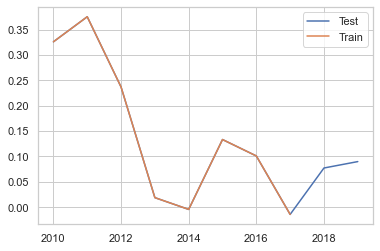

In [84]:
Final = pd.concat([Final, IndVar],axis=1)
Final.columns = ['Test', 'Train']
Final.plot.line()

----

## A maching Learning Approache

In [85]:
from sklearn.linear_model import LogisticRegressionCV

In [86]:
Dataset

,Long_Term_Government_Bond_Yields,Consumer_Price_Index,Inflation,Production_of_Total_Industry_in_Italy,Interbank_Rates_for_Italy,Growth_Rate_Same_Period_Previous_Year,Growth_Rate_Previous_Period,Real_Gross_Domestic_Product,Unemployment_Rate,General_Government_Gross_Debt,Working_Age_Population,Indep_Var
2010,4.035708,92.995531,0.127126,107.791017,0.810950,1.524958,0.155475,134273.283333,0.718820,9.933167,3.252352e+06,0.326063
2011,5.422758,95.581395,0.231719,108.640947,1.390600,2.778950,0.270091,135223.043043,0.718948,9.974333,3.259556e+06,0.375438
2012,5.492675,98.488372,0.253447,102.399800,0.573183,3.043549,0.190333,131192.171552,0.917778,10.541083,3.258973e+06,0.236938
2013,4.316425,99.689922,0.101666,99.250062,0.220667,1.222716,0.054815,128776.837808,1.044228,11.037917,3.264296e+06,0.018813
2014,2.893200,99.930233,0.020087,98.625115,0.209933,0.241673,0.000137,128770.981627,1.085923,11.280500,3.263421e+06,-0.004375
2015,1.713950,99.968992,0.003233,99.641697,-0.019367,0.038753,0.008070,129773.211779,1.014234,11.273333,3.252900e+06,0.133375
2016,1.486433,99.875000,-0.007835,101.691526,-0.263692,-0.093699,0.040705,131451.779909,0.992926,11.232000,3.239246e+06,0.101000
2017,2.112925,101.100000,0.102211,105.491209,-0.329050,1.227106,0.074806,133644.210305,0.953351,11.177917,3.227142e+06,-0.014250


In [87]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [88]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = data.shape[1]
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(data.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(data.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=0)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [89]:
X = pd.DataFrame(series_to_supervised(Dataset,n_out=1))
y = pd.DataFrame(series_to_supervised(IndVar,n_out=1))

In [90]:
# walk_forward_validation

trainX, trainy = X.iloc[:-2, :], y.iloc[:-2, :]
st = X.iloc[-2:, :]

In [91]:
def walk_forward_validation(data, target, steps,  UnknownData):
    SumMeanAbsoluteError = 0
    UnknownDataPredictions = []

    # step over each time-step in the test set
    for i in range(1,steps):
        trainX, trainY = data.iloc[:-i, :], target.iloc[:-i, :]
        testX, testY = data.iloc[-i:, :], target.iloc[-i:, :]
        # fit model on history and make a prediction
        model = RandomForestRegressor(n_estimators=1000)
        model.fit(trainX, trainY)
        predictions = model.predict(testX)
        UnknownDataPredictions.append(model.predict(UnknownData))

        MeanAbsoluteError = mean_absolute_error(testY, predictions)

        # store forecast in list of predictions
        SumMeanAbsoluteError += MeanAbsoluteError
    
    Final = MeanAbsoluteError / (steps-1)
    return Final, UnknownDataPredictions




In [92]:
NewValues = walk_forward_validation(X, y, 3, st)[1]
NewValues = pd.DataFrame(NewValues).sum()/2
NewValues.index=[2018,2019]
NewValues = pd.DataFrame(NewValues, columns = ['Indep_Var'])
NewValues

,Indep_Var
2018,0.108047
2019,0.134986


In [93]:
error = walk_forward_validation(X, y, 3, TestVariables)[0]
error

print('MAE: %.3f' % error)

MAE: 0.040


In [94]:
from matplotlib import pyplot

In [95]:
Values = pd.concat([IndVar,NewValues])

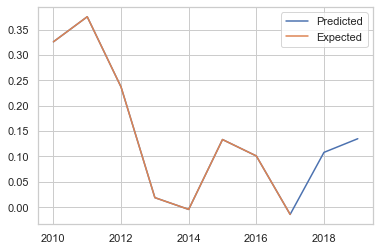

In [140]:
pyplot.plot(Values, label='Predicted')
pyplot.plot(IndVar, label='Expected')
pyplot.legend()
pyplot.show()

In [97]:
liis = ListOfDelta(Predictions.shape[0], TTC, 0.01, NewValues)

fitted = liis[0]
fitted.index = range(1,12)
fitted

,1,2,3,4,5,6,7,8,9,10,11
1,97.125872,1.449761,1.134821,0.220123,0.015981,0.033429,0.005392,0.003032,0.001945,0.000203,0.004779
2,2.560344,96.051192,0.135896,0.290298,0.392989,0.456234,0.089770,0.005986,0.007216,0.000220,0.005194
3,0.458448,2.837011,95.605471,0.028646,0.055339,0.412584,0.451712,0.118954,0.014038,0.007255,0.005880
4,0.005816,1.275673,3.005474,94.288670,0.071023,0.067934,0.995864,0.008656,0.255355,0.011304,0.009569
5,0.006239,0.875932,0.814249,2.322516,94.364898,0.079232,1.097723,0.036982,0.370395,0.015030,0.012142
6,0.008095,0.079299,1.297518,0.148996,1.761551,94.429389,0.157689,1.276805,0.584332,0.229148,0.022518
7,0.005017,0.082377,0.221870,0.814623,0.892291,1.748488,92.221108,0.170525,2.102114,1.651467,0.085457
8,0.004275,0.036775,0.474612,0.097631,0.113524,3.746716,3.654636,84.764209,1.266716,5.542461,0.293785
9,0.004639,0.055874,0.113377,0.494050,0.789837,2.225105,8.512717,2.154164,72.646865,11.427248,1.571461
10,0.000835,0.009998,0.049680,0.119210,0.180855,1.378690,9.278500,9.209323,12.351234,49.940345,17.476668


In [98]:
fitted = liis[1]
fitted.index = range(1,12)
fitted

,1,2,3,4,5,6,7,8,9,10,11
1,97.143529,1.441802,1.127426,0.218376,0.015841,0.033120,0.005339,0.003001,0.001925,0.000201,0.004726
2,2.576503,96.044519,0.135080,0.288502,0.390410,0.452864,0.088983,0.005928,0.007143,0.000218,0.005136
3,0.462065,2.853325,95.593271,0.028468,0.054993,0.409898,0.448424,0.117941,0.013904,0.007182,0.005815
4,0.005876,1.284568,3.021225,94.273662,0.070600,0.067527,0.989299,0.008592,0.253277,0.011194,0.009467
5,0.006303,0.882332,0.819185,2.334561,94.352272,0.078772,1.090753,0.036719,0.367488,0.014887,0.012014
6,0.008178,0.080012,1.306298,0.149878,1.771024,94.423960,0.156830,1.269258,0.580289,0.227270,0.022290
7,0.005069,0.083121,0.223612,0.820076,0.897510,1.757509,92.222146,0.169714,2.091197,1.640660,0.084672
8,0.004320,0.037123,0.478238,0.098302,0.114285,3.766836,3.669846,84.760067,1.261518,5.513389,0.291363
9,0.004687,0.056391,0.114315,0.497606,0.794788,2.236931,8.545712,2.160663,72.642670,11.380703,1.560820
10,0.000844,0.010099,0.050135,0.120193,0.182221,1.387423,9.317871,9.234665,12.372432,49.912382,17.407022


# THE END